In [20]:
from typing import TypedDict,Dict
from langgraph.graph import StateGraph,START,END

In [21]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int
    


    

In [22]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtracter(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState)->AgentState:
    """This node will design the next node based on the operation"""
    if state['operation'] == '+':
        return "addition_operation"
    else:
        return "subtraction_operation"

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtracter)
graph.add_node("router",lambda state : state)
graph.add_node("router2",lambda state : state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
         "addition_operation":"add_node",
         "subtraction_operation":"subtract_node"
    }


)

graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")

app = graph.compile()

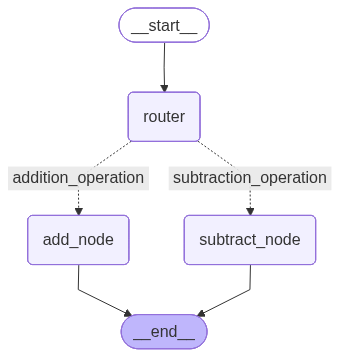

In [31]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))



In [32]:
print(app.invoke({"number1":2,"operation":"+","number2":3}))

{'number1': 2, 'operation': '+', 'number2': 3, 'finalNumber': 5}
